In [0]:
!unzip drive/My\ Drive/train

In [0]:
import os 
import numpy as np
import pandas as pd
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import keras

### data preparation

In [0]:
labels = pd.read_csv('./drive/My Drive/labels.csv')

In [0]:
breed = labels.breed.values
bid = labels.id.values 

In [0]:
test = os.listdir('./test/')
train = os.listdir('./train/')

In [0]:
train_img = []

m = bid.shape[0]

for i in range(m):
  img = cv2.imread('./train/'+bid[i]+'.jpg')
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (100, 100))
  train_img.append(img)
    


In [0]:
test_img = []
test_id = []
m_test = len(test)
for i in range(m_test):
  tid = test[i]
  img = cv2.imread('./test/'+str(tid))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (100, 100))
  test_img.append(img)
  test_id.append(tid)

In [43]:
print(len(test), len(train))

10357 10222


In [44]:
print(len(test_img), len(train_img))

10357 10222


In [0]:
x_train = np.asarray(train_img)
x_test = np.asarray(test_img)

In [69]:
print(x_train.shape, x_test.shape)

(10222, 100, 100, 3) (10357, 100, 100, 3)


In [0]:
# convert the label into one hot encoded
y_train = pd.get_dummies(breed).values

In [68]:
y_train.shape

(10222, 120)

# model 

In [0]:
from keras.models import Sequential
from keras.layers import *

In [144]:
model = Sequential()
model.add(Conv2D(100, kernel_size=(5, 5),  activation='relu', input_shape = (100, 100, 3)))
# model.add(Conv2D(128, kernel_size=(3, 3),  activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3),  activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, kernel_size=(3, 3),  activation='relu', strides = 4))
model.add(Conv2D(32, kernel_size=(3, 3),  activation='relu', strides = 2))
model.add(Flatten())
# model.add(Dense(240, activation='relu'))
model.add(Dense(120, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_222 (Conv2D)          (None, 96, 96, 100)       7600      
_________________________________________________________________
conv2d_223 (Conv2D)          (None, 94, 94, 64)        57664     
_________________________________________________________________
dropout_43 (Dropout)         (None, 94, 94, 64)        0         
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_224 (Conv2D)          (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_225 (Conv2D)          (None, 5, 5, 32)          18464     
_________________________________________________________________
flatten_26 (Flatten)         (None, 800)               0         
__________

In [0]:
# compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [146]:
hist = model.fit(x_train,y_train,epochs=100,shuffle=True, batch_size=512, validation_split=0.2)

Train on 8177 samples, validate on 2045 samples
Epoch 1/100
8177/8177 [==============================] - 23s 3ms/step - loss: 15.7798 - acc: 0.0095 - val_loss: 14.4969 - val_acc: 0.0122
Epoch 2/100
8177/8177 [==============================] - 14s 2ms/step - loss: 6.2685 - acc: 0.0084 - val_loss: 4.7882 - val_acc: 0.0073
Epoch 3/100
8177/8177 [==============================] - 13s 2ms/step - loss: 4.7832 - acc: 0.0105 - val_loss: 4.7905 - val_acc: 0.0064
Epoch 4/100
8177/8177 [==============================] - 13s 2ms/step - loss: 4.7636 - acc: 0.0137 - val_loss: 4.7707 - val_acc: 0.0127
Epoch 5/100
8177/8177 [==============================] - 13s 2ms/step - loss: 4.7058 - acc: 0.0215 - val_loss: 4.7129 - val_acc: 0.0225
Epoch 6/100
8177/8177 [==============================] - 13s 2ms/step - loss: 4.5445 - acc: 0.0356 - val_loss: 4.6265 - val_acc: 0.0249
Epoch 7/100
8177/8177 [==============================] - 13s 2ms/step - loss: 4.3341 - acc: 0.0586 - val_loss: 4.5924 - val_acc: 0.025

In [0]:
def plot_loss_accuracy():
  # plot loss
  print("training_loss =", hist.history['loss'][-1],  "   val_loss =", hist.history['val_loss'][-1])
  print("training_acc =", hist.history['acc'][-1]*100, "   val_acc =", hist.history['val_acc'][-1]*100)
  plt.plot(hist.history['val_loss'], label='val_loss')
  plt.plot(hist.history['loss'], label='training_loss')

  # plot accuracy
  plt.plot(hist.history['val_acc'], label='val_acc')
  plt.plot(hist.history['acc'], label='training_acc')
  plt.legend()
  plt.show()

training_loss = 0.09461912659476493    val_loss = 14.02513499971124
training_acc = 97.54188594993641    val_acc = 2.9339853482899283


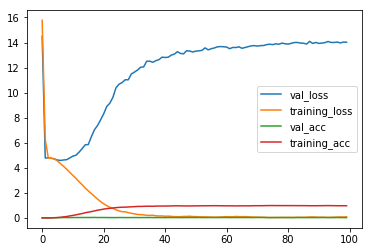

In [148]:
plot_loss_accuracy()